In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Contagem de nulos

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
deletar = df[df['TotalCharges'] == ' ']
df.drop(deletar.index, inplace=True)

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('string')
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['tenure'] = df['tenure'].astype('float')
df['MonthlyCharges'] = df['MonthlyCharges'].astype('float')

# Validando contagem de valores

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


## Validação de outliers e verificação da distribuição dos valores

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


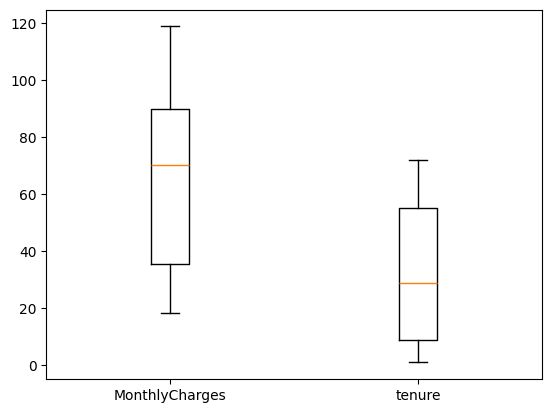

In [ ]:
plt.boxplot([df['MonthlyCharges'], df['tenure']])
plt.xticks([1, 2], ['MonthlyCharges', 'tenure'])
plt.show()

In [ ]:
# validação da correlação entre as variáveis categóricas

# Função para calcular V de Cramér
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Lista das colunas categóricas (excluindo Churn)
colunas_categoricas = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
                    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                    'Contract','PaperlessBilling','PaymentMethod']

# Calcular V de Cramér entre cada variável e Churn
cramers_results = {}
for col in colunas_categoricas:
    cramers_results[col] = cramers_v(df[col], df['Churn'])

#Associação forte 0,3 - 0,5
#associação intermediária 0,2 - 0,3


# Mostrar resultados ordenados
cramers_sorted = dict(sorted(cramers_results.items(), key=lambda item: item[1], reverse=True))
for col, val in cramers_sorted.items():
    print(f"{col}: {val:.3f}")

Contract: 0.410
OnlineSecurity: 0.347
TechSupport: 0.343
InternetService: 0.322
PaymentMethod: 0.303
OnlineBackup: 0.292
DeviceProtection: 0.281
StreamingMovies: 0.231
StreamingTV: 0.230
PaperlessBilling: 0.191
Dependents: 0.163
SeniorCitizen: 0.150
Partner: 0.150
MultipleLines: 0.040
PhoneService: 0.011
gender: 0.008


In [ ]:
# Normalização de valores
colunas_categoricas.append('Churn')
# Seleciona apenas as colunas numéricas
num_cols = ['tenure','MonthlyCharges','TotalCharges']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

# Se tiver variáveis categóricas, combine depois
X_scaled = pd.DataFrame(X_scaled, columns=num_cols)

# Reset the index of both dataframes before concatenating
X_scaled = X_scaled.reset_index(drop=True)
df_categorical = df[colunas_categoricas].reset_index(drop=True)

df_final = pd.concat([X_scaled, df_categorical], axis=1)

df_final

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.280248,-1.161694,-0.994194,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,0.064303,-0.260878,-0.173740,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,-1.239504,-0.363923,-0.959649,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,0.512486,-0.747850,-0.195248,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,-1.239504,0.196178,-0.940457,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7028,1.612573,1.276493,2.241056,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7029,-0.872808,-1.170004,-0.854514,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7030,-1.158016,0.319168,-0.872095,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [ ]:
# Seleciona apenas as colunas nominais que precisam de dummies
nominal_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Criar dummies
df_dummies = pd.get_dummies(df[nominal_cols], drop_first=True)

# Variáveis binárias já podem ser convertidas para 0/1
binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling']
df[binary_cols] = df[binary_cols].replace({'Yes':1,'No':0})

# Combinar tudo
df_final = pd.concat([df[['tenure','MonthlyCharges','TotalCharges'] + binary_cols], df_dummies, df['Churn']], axis=1)


/tmp/ipython-input-3286733705.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes':1,'No':0})


## Análise preditiva

In [ ]:
# X = features
X = df_final.drop('Churn', axis=1)

# y = variável alvo (0/1)
y = df_final['Churn'].map({'No':0, 'Yes':1})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Acurácia: 0.7348969438521677
Matriz de Confusão:
 [[737 296]
 [ 77 297]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.73      0.75      1407

ROC-AUC: 0.8319960035409043


In [ ]:
import pandas as pd
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print(coef_df)


                                  Feature  Coeficiente
8          MultipleLines_No phone service     0.518334
10            InternetService_Fiber optic     0.384969
27         PaymentMethod_Electronic check     0.297379
3                           SeniorCitizen     0.258395
7                        PaperlessBilling     0.255572
9                       MultipleLines_Yes     0.112955
23                    StreamingMovies_Yes     0.100265
21                        StreamingTV_Yes     0.090389
4                                 Partner     0.042187
1                          MonthlyCharges     0.014799
2                            TotalCharges     0.000296
12     OnlineSecurity_No internet service    -0.054271
11                     InternetService_No    -0.054271
22    StreamingMovies_No internet service    -0.054271
16   DeviceProtection_No internet service    -0.054271
20        StreamingTV_No internet service    -0.054271
14       OnlineBackup_No internet service    -0.054271
18        